# TP Calcul de racines

Durant ce TP, nous nous intéressons aux méthodes numériques pour déterminer les zéros de fonctions.

## Recherche de minimum

L'une des applications de l'obtention des zéros est la détermination d'extremums locaux. Dans cette partie, nous nous intéresserons seulement aux minimums. Un minimum local d'une fonction $f$ correspond à un $x_{min}$ tel que il existe un intervale $I=]a,b[$ tel que $\forall x \in I, f(x)\geq f(x_{min})$.

### Question
1. Afficher le graphique de la fonction $f(x)=2x^6-12x^5+15x^4+20x^3-36x^2+4$ et trouver un intervalle qui permette de voir tous ses minimums locaux. *Vous pourrez utiliser la fonction d'interaction vue au TP1* `@interact`.
1. Afficher à la fois le graphe de $f$ et de sa dérivée. Vérifiez que la derivée de $f$ s'annule toujours dans un minimum local de $f$.
1. Trouver au moins un point $x_0$ qui n'est pas un minimum local et qui pourtant verifie $f'(x_0)=0$. Que peut t-on dire sur ce point ?

In [3]:
f(x) = 2*x^6 - 12*x^5 + 15*x^4 + 20*x^3 - 36*x^2 + 4
@interact
def _(k = slider(1..10)):
    F = plot(f,-2,k)
    F.show()

Interactive function <function _ at 0x1065923b0> with 1 widget
  k: SelectionSlider(description='k', options=(…

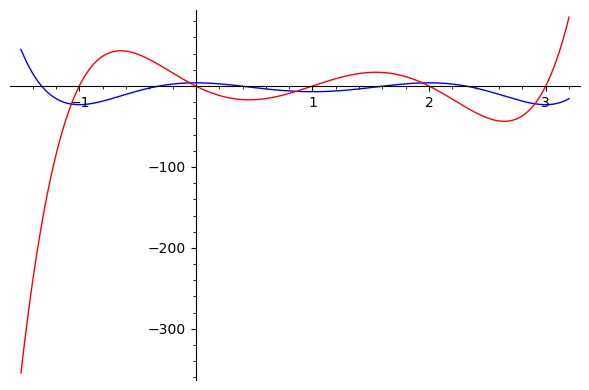

In [4]:
df = f.derivative()
plot(f,-1.5,3.2) + plot(df,-1.5,3.2,color="red")

In [5]:
### Pour x = 0, f'(x) = 0 et x n'est pas un minimum local de f

### Question

Tout extremum local d'une fonction dérivable $f$ correspond à une racine de sa dérivée. Nous allons utiliser cette propriété pour déterminer  les minimums de f.

1. En utilisant la méthode `find_root` sur des intervalles adaptés (que vous trouverez à la main) calculer chacune des racines de $f'$ qui correspond à un minimum de $f$.
1. Evaluer $f$ et $f'$ en ces points. Vous devrez constater que `find_root` est une méthode de calcul numérique approchée.
1. Trouver d'autres intervalles de recherches de telles sorte que les évaluations de $f$ diffèrent. 

In [6]:
racines_minimum = []
racines_minimum.append(find_root(df,-1.1,-0.9))
racines_minimum.append(find_root(df,0.9,1.1))
show(racines_minimum)

[-1.0000000000001752, 0.9999999999999998]

In [7]:
show(f(racines_minimum[0]))
show(f(racines_minimum[1]))

show(df(racines_minimum[0])) ### Ici, on devrait avoir exactement 0
show(df(racines_minimum[1])) ### De même ici
                             ### Mais find_root calcule numériquement

-22.99999999999999

-7.000000000000003

-5.044498152528831e-11

-1.4210854715202004e-14

La méthode `find_root`renvoie une approximation numérique d'une racine de la fonction comprise dans l'intervalle donné en paramètres. Ainsi il peut y avoir une marge d'erreur $\epsilon$ entre la véritable racine $r$ et la valeur $\overline{r}= r +\epsilon$ renvoyée par la méthode. Cette erreur se propage ensuite dans les calculs réalisés à partir de $\overline{r}$.

Une autre approche consiste à passer par le calcul symbolique pour trouver les racines. La méthode `roots` cherche à calculer toutes les racines de manière exacte dans l'anneau symbolique `SR`. Cependant cette méthode peut échouer à calculer certaines racines. 

### Question
1. Tester la méthode `roots` pour calculer les racines de la fonction $h(x)=x^5 + x^3 + x + 1$.
1. En utilisant la méthode `roots`, calculer les racines de $f'$ pour la fonction $f$ de la question précédente.
1. S'agit-il à chaque fois d'un minimum local de $f$ ? Sont-ils tous présents ? *Vous afficherez sur un graphique la fonction ainsi que les points correspondants aux racines trouvées*. 
1. Écrire une fonction qui calcule les minimums locaux d'une fonction polynomiale lorsque la méthode `roots` trouve bien toutes les racines de sa dérivée. **Rappel:** une fonction polynomiale de degrès $d$ a exactement $d$ racines (potentiellement dans la cloture algébrique). Pour récupérer l'erreur potentielle de la méthode `roots`, vous pourrez utiliser les exceptions python:
```python:
try :
      ... # code qui appelle roots     
except RuntimeError :
      raise ValueError("message d'erreur")  
    
1. Écrire une fonction qui affiche une fonction polynomiale et tous ses minimums locaux. 
1. Vérifier que vos fonctions sont correctes en utilisant la fonction $f$ de la question précédente.

In [8]:
h(x) = x^5 + x^3 + x + 1
show(find_root(h,-1,1))
#h.roots()
### Roots ne parvient pas à trouver une expression symbolique pour les racines de h

-0.6368829168018447

In [9]:
df.roots()
### Pas toujours un minimum local (parfois un maximum local ?), mais ils y sont tous

[(3, 1), (-1, 1), (1, 1), (2, 1), (0, 1)]

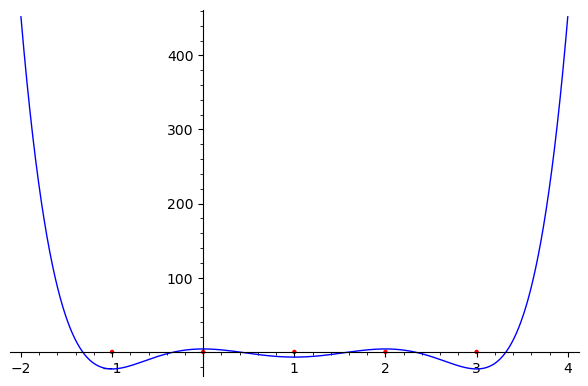

In [10]:
graph = plot(f,-2,4)
for e in df.roots():
    graph += point((e[0],0),color="red")
graph.show()

In [11]:
def min_locaux(f):
    df = f.derivative()
    cpt = 0
    try:
        racines_derivees = df.roots()
    except RuntimeError:
        raise ValueError("Roots ne parvient pas à trouver les racines symboliques")
    for e in racines_derivees:
        cpt += e[1]
    if(cpt != df.degree(x)):
        raise ValueError("Roots ne parvient pas à trouver toutes les racines symboliques")
    res = []
    for r in racines_derivees:
        if(df(r[0] - 1e-10) < 0 and df(r[0] + 1e-10) > 0):
            res.append(r)
    return res

In [12]:
min_locaux(df)

[(-1/2*sqrt(-2/5*sqrt(29)*sqrt(5) + 6) + 1, 1),
 (1/2*sqrt(2/5*sqrt(29)*sqrt(5) + 6) + 1, 1)]

In [13]:
def affiche_poly_et_minslocaux(f):
    liste_mins = min_locaux(f)
    min_min = min([r[0] for r in liste_mins])
    min_max = max([r[0] for r in liste_mins])
    graph = plot(f,min_min - 1,min_max + 1)
    for e in liste_mins:
        graph += point((e[0],0),color="red")
    graph.show()

### Question
1. Tester aussi vos fonctions sur sur les fonctions polynomiales suivantes :

    -$f_1(x)=15x^6 - 51x^5 - 60x^4 + 185x^3 + 60x^2 - 90x-17$
    
    -$f_2(x)=3x^5 - \frac{45}{8}x^4 + \frac{25}{2}x^3 - \frac{45}{2}x^2 + 15x+42$
    
    -$f_3(x)=-5x^6 - 42x^5 - 15x^4 + 640x^3 + 1440x^2 -32$
    
    -$f_4(x)=-x^7 + \frac{1}{3}x^6 - \frac{7}{5}x^5 + \frac{1}{2}x^4 - \frac{7}{3}x^3 - \frac{5}{2}x^2 + 2x$
1. Utiliser l'affichage des fonctions pour vérifier vos réponses et adapter votre programme si besoin. *La méthode `factor` appliquée à la dérivée peut aider à comprendre ce qu'il se passe.*


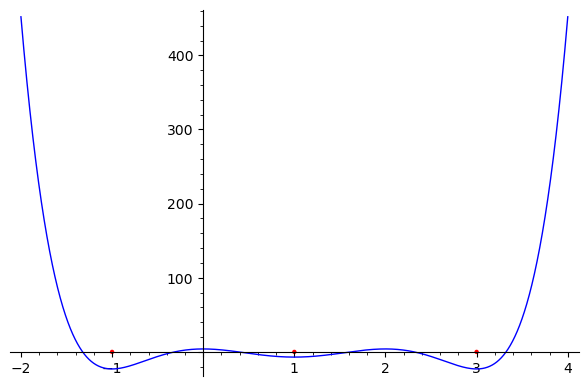

In [14]:
affiche_poly_et_minslocaux(f)

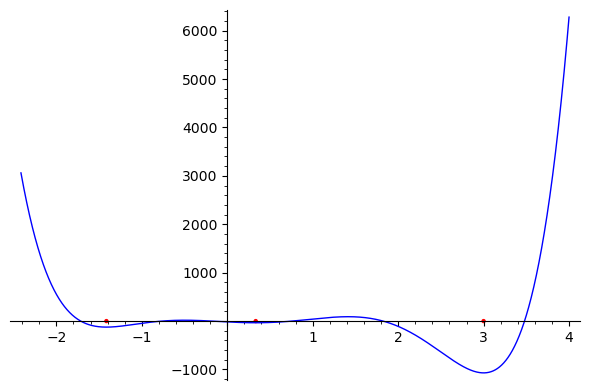

3.00000000000000


In [15]:
f1(x) = 15*x^6 - 51*x^5 - 60*x^4 + 185*x^3 + 60*x^2 - 90*x - 17
affiche_poly_et_minslocaux(f1)
print(3.n())

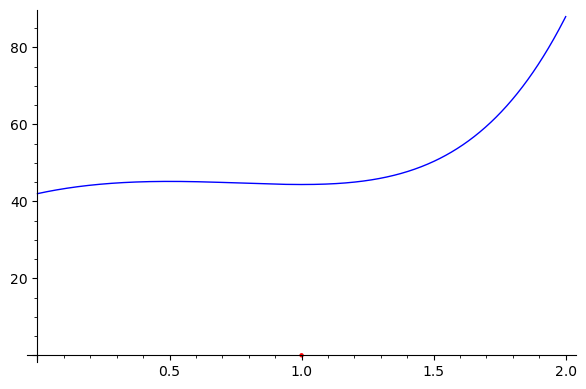

In [16]:
f2(x) = 3*x^5 - (45/8)*x^4 + (25/2)*x^3 - (45/2)*x^2 + 15*x + 42
affiche_poly_et_minslocaux(f2)

x |--> -30*(x + 4)^2*(x + 2)*(x - 3)*x

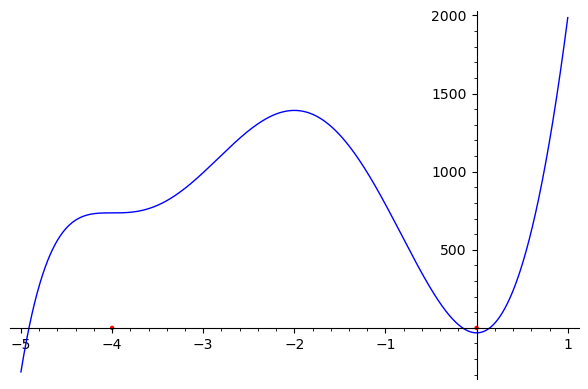

In [17]:
f3(x) = -5*x^6 - 42*x^5 - 15*x^4 + 640*x^3 + 1440*x^2 - 32
show(f3.derivative().factor())
affiche_poly_et_minslocaux(f3)

In [18]:
f4(x) = -x^7 + (1/3)*x^6 - (7/5)*x^5 + (1/2)*x^4 - (7/3)*x^3 - (5/2)*x^2 + 2*x
#affiche_poly_et_minslocaux(f4)

In [19]:
df4 = f4.derivative()
show(df4.factor())

x |--> -(x^5 + x^3 + x + 1)*(7*x - 2)

Dans la suite du TP, nous allons voir des méthodes pour calculer une approximation numérique $\overline{r}$ d'une racine $r$ d'une fonction à une précision voulue en réglant la taille possible de l'erreur $\epsilon$ telle que $\overline{r}=r + \epsilon$.

## Dichotomie

Cette méthode considère une fonction continue $f$ et un intervalle $[a,b]$ tel que $f(a)$ et $f(b)$ sont de signes différents ($f(a)\times f(b)<0$). Comme $f$ est continue, il existe forcément un point $x\in[a,b]$ tel que $f(x)=0$.
A chaque étape la méthode divise l'intervalle de recherche par $2$ en choisissant le sous-intervalle contenant la racine (signes des évaluations des extrémités différents). 

Quand l'intervalle est plus petit que la précision voulue tout point de cet intervalle est alors une bonne approximation de la racine. La méthode devra s'arrêter avant si l'une des deux extrémités de l'intervalle est la racine.

### Question
 Ecrire un algorithme récursif `dicho_roots` qui prend en entrée une fonction continue $f$, les extrémités d'un intervalle de recherche $[a,b]$ et une précision $p<1$ et qui calcule par dichotomie une approximation numérique d'une racine de $f$ dans l'intervalle $[a,b]$ à la précision $p$. 

**Rappel:** si $p=0,01$ cela signifie que l'on veut que la racine soit correcte jusqu'au deuxième chiffre après la virgules. Autrement dit, on cherche un intervalle $[\alpha, \beta] \subset [a,b]$ tel que $|\beta-\alpha|\leq p$. 

**Attention**, pour que la méthode `dicho_roots` fonctionne, il faut que les calculs se fassent dans la précision désirée (on utilisera donc un `RealField` adéquat, qui a une précision en bit de $1+\log_2(1/p)$).

1. Utiliser votre algorithme pour calculer une approximation numérique des racines  des fonctions $f'$ et $h$ définies dans la partie précédente. *Vous utiliserez l'affichage des fonctions pour définir les intervalles de recherche de départ et vous prendrez une précision de calcul des float (soit $2^{-23}$)*
1. Modifier votre algorithme pour qu'il renvoie aussi le nombre d'étapes (c'est à dire le nombre d'intervalles de recherches différents utilisés).
1. Trouver un réel $a$ et un paramètre de précision $p$ permettant d'avoir des résultats plus précis avec la méthode `dicho_roots` qu'avec la méthode `find_root` sur les intervalles $[a+i,a+i+1], \forall i \in \{0,1,2,3,4\}$. 

In [20]:
def dicho_roots(f,a,b,p,n = 1):
    R = RealField(1 + log(1/p,2))
    A = R(a)
    B = R(b)
    M = R((A+B)/2)
    
    try:
        f(A) * f(B) < 0
    except RuntimeError:
        raise ValueError("Il n'y a pas de racines sur [a,b] car f(a) * f(b) > 0 ou bien f n'est pas continue sur [a,b]")
        
    if(abs(B-A) <= p):
        return (M,n)
    
    if(f(A) == 0):
        return (A,n)
    if(f(B) == 0):
        return (B,n)
    if(f(M) == 0):
        return (M,n)
        
    if(f(A) * f(M) < 0):
        return dicho_roots(f,a,M,p,n+1)
    if(f(M) * f(B) < 0):
        return dicho_roots(f,M,b,p,n+1)

In [21]:
show(dicho_roots(df,-1.2,-0.9,0.1))
show(dicho_roots(f3,-1,0.1,0.00001))
show(dicho_roots(h,-1,1,0.01))

(-1.0, 3)

(-0.1545, 18)

(-0.64, 9)

## Fausse position

Pour cette méthode plutôt que de diviser systématiquement l'intervalle $[a,b]$ en deux, on utilise les valeurs de la fonction $f'$ pour couper l'intervalle. En particulier, on coupe l'intervalle en un point $m$ qui est à l'intersection de l'axe des abscisses et de la droite qui passe par les point $(a,f'(a))$ et $(b,f'(b))$

La même règle des signes permet de déterminer dans quel intervalle ($[a,m]$ ou $[m,b]$) se trouve une racine.

### Question
1. Sachant qu'une droite est une fonction de la forme $d(x)=\alpha x + \beta$. Donner une fonction qui calcule la droite passant par des points $p_1=(x_1,y_1)$ et $p_2=(x_2,y_2)$.
1. Pour $a=-0.8$, $b=0.8$ et la fonction $f'$ calculer la droite $d$ passant par $(a,f'(a))$ et $(b,f'(b))$.
1. Déterminer le point $m$ où la droite $d(x)$ vaut $0$ et calculer $f'(m)$. Grâce à la règle des signes déterminer dans quel sous-intervalle de $[a,m]$ ou $[m,b]$ se trouve une une racine de $f'$.
1. Représenter graphiquement ces différentes étapes (la fonction sur $[a,b]$, la droite, le point $m$, $f'(m)$ et le nouvel intervalle). *Utiliser des couleurs pour faciliter la lecture des graphiques.*
1. Réduiser une fois de plus l'intervalle et compléter le graphique.

In [22]:
def eq_droite(p1,p2):
    a = (p2[1] - p1[1])/(p2[0] - p1[0])
    q = var('q')
    eq = (p1[1] == a * p1[0] + q)
    b = solve(eq,q)[0].rhs()
    return a*x+b

x |--> -28.6848000000000*x + 1728/125

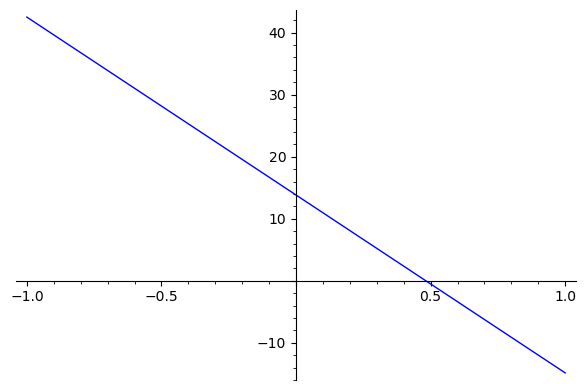

In [23]:
a = -0.8
b = 0.8
d(x) = eq_droite((a,df(a)),(b,df(b)))
show(d)
plot(d)

In [24]:
m = solve(d == 0,x)[0].rhs()
dfm = df(m)
show(m)
show(dfm)
show(bool(df(a) * dfm < 0)) ### On remarque que la racine de f' va se trouver dans [a,m]
show(bool(dfm * df(b) < 0))

40/83

-66854652480/3939040643

True

False

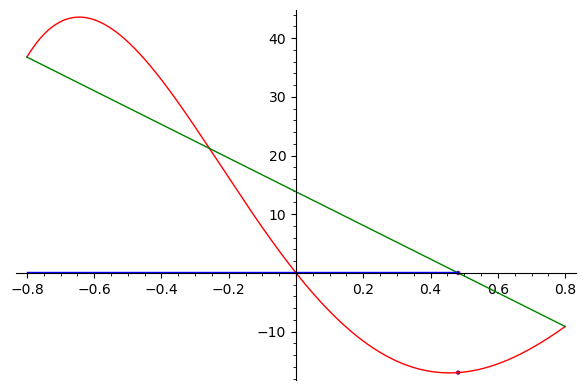

In [25]:
graph = plot(df,a,b,color="red")
graph += plot(d,a,b,color="green")
graph += point(m,color="purple")
graph += point((m,dfm),color="purple")
graph += line(((m,0.2),(a,0.2)),color="blue")
graph.show()

x |--> -41.9244845644834*x + 28991904/8969567

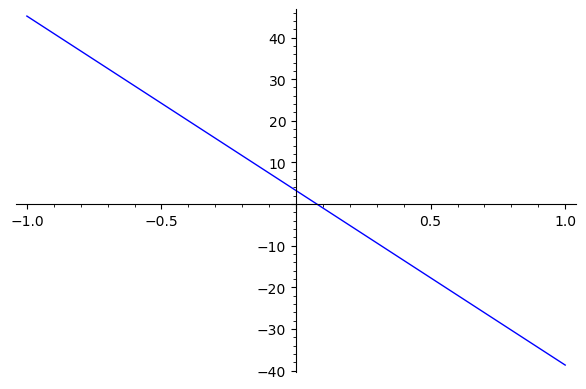

In [26]:
a = -0.8
b = m
d(x) = eq_droite((a,df(a)),(b,df(b)))
show(d)
plot(d)

In [27]:
m = (solve(d == 0,x)[0].rhs())
dfm = df(m)
show(m)
show(dfm)
show(bool(df(a) * dfm < 0)) ### On remarque que la racine de f' va se trouver dans [a,m]
show(bool(dfm * df(b) < 0))

40121968425360/520408886630233

-197299027379652717083712460236278006439439717931510119606939958127945352320/38170119566402509529512950193587118385266848225338158912736968418641006393

True

False

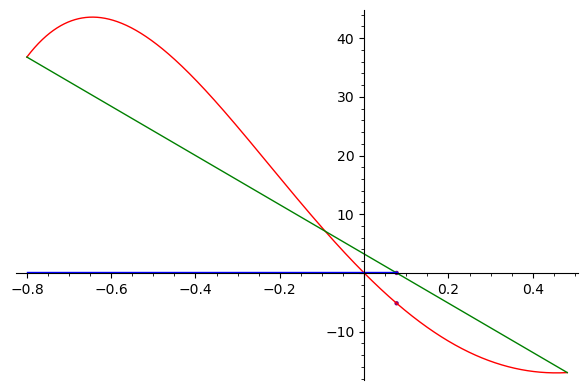

In [28]:
graph = plot(df,a,b,color="red")
graph += plot(d,a,b,color="green")
graph += point(m,color="purple")
graph += point((m,dfm),color="purple")
graph += line(((m,0.2),(a,0.2)),color="blue")
graph.show()

###  Question
1. Ecrire un algorithme récursif `fausse_position_roots` qui prend en entrée une fonction continue $f$, les extrémités d'un intervalle $[a,b]$ de recherche et une précision $p$ et qui calcule par la fausse position une approximation numérique d'une racine de $f$ dans $[a,b]$ à la précision $p$.
1. Utiliser votre algorithme pour calculer une approximation numérique des racines  des fonctions $f'$ et $h$.
1. Modifier votre algorithme pour qu'il renvoie aussi le nombre d'intervalles de recherches différents utilisés.
1. Comparer le nombre d'étapes des deux méthodes dichotomie et fausse position en cherchant sur le même intervalle $[a+i,a+i+1], \forall i \in \{0,1,2,3,4\}$ avec $a=-1.3$ et la même précision $p=2^{-20}$. Refaite le calcul avec $a= -1.00000001$. À votre avis quelle est la meilleure méthode.

In [29]:
def fausse_position_roots(f,a,b,p,n = 1): ### Cette fonction est NULLE
    R = RealField(1 + log(1/p,2))
    A = R(a)
    B = R(b)
    eq = eq_droite((A,f(A)),(B,f(B))) == 0
    M = R(solve(eq,x)[0].rhs())
    
    if(abs(B-A) <= p):
        return (M,n)
    
    if(f(A) == 0):
        return (A,n)
    if(f(B) == 0):
        return (B,n)
    if(f(M) == 0):
        return (M,n)

    if(f(A) * f(M) < 0):
        return fausse_position_roots(f,a,m,p,n+1)
    if(f(M) * f(B) < 0):
        return fausse_position_roots(f,m,b,p,n+1)

In [32]:
show(dicho_roots(df,-0.8,0.8,0.1))
show(fausse_position_roots(df,-0.8,0.8,0.1))

(0.00, 1)

(0.00, 2)

## Méthode de Newton
Dans la méthode de la fausse position la fonction est approchée par une droite passant par les deux points aux extrémités de l'intervalle.
Dans la méthode de Newton, la fonction est approchée par sa tangente.
Cependant, cette fois-ci la progression ne se fait pas d'intervalle en intervalle mais de point en point. Autrement dit, on va partir d'une approximation très grossière de notre racine et on va l'affiner au fur et à mesure des étapes. En partant d'un point $a$, le point suivant est donné par le zéro de la tangente en $a$. Quand l'écart entre deux points consécutifs est inférieur à la précision, on peut renvoyer le dernier point calculé.

### Question
1. Ecrire une fonction calculant la tangente à une fonction $g$ en un point $a$. *Il s'agit de la droite passant par le point $(a,g(a))$ et de pente $g'(a)$.* 
>Vous vérifierez votre code pour la fonction $x\mapsto x^2-2x+8$ dont la tangente en $x=3$ correspond à la fonction $x \mapsto 4x-1$
1. Pour la fonction $h$, avec $a=-1.2$, calculer la tangente $T_a(x)$ à $h(x)$ en $a$ et représenter sur un même graphique $h(x)$ et $T_a(x)$.
1. Trouver le point $x_a$ tel que $T_a(x_a)=0$ et calculer la tangente à $h(x)$ en ce point $x_a$. Compléter le graphique. *Le zéro peut aussi être calculer directement sans calculer la tangente*
1. Reproduire cette étape jusqu'à avoir visuellement l'impression qu'une tangente et la courbe ont le même zéro.

In [66]:
def tangente(f,a):
    f(x) = f
    df(x) = f.derivative()
    b = var('b')
    eq = f(a) == df(a) * a + b
    b = solve(eq,b)[0].rhs()
    return df(a) * x + b

In [67]:
show(tangente(x^2 - 2*x + 8,3))

4*x - 1

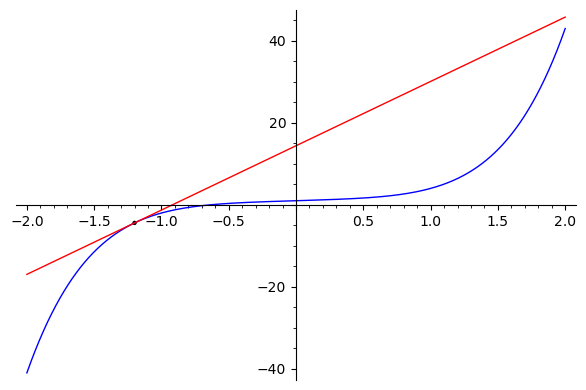

In [91]:
a = -1.2
TA(x) = tangente(h,a)
graph = plot(h,-2,2) + plot(TA,-2,2,color="red") + point((a,h(a)),color="black")
graph.show()

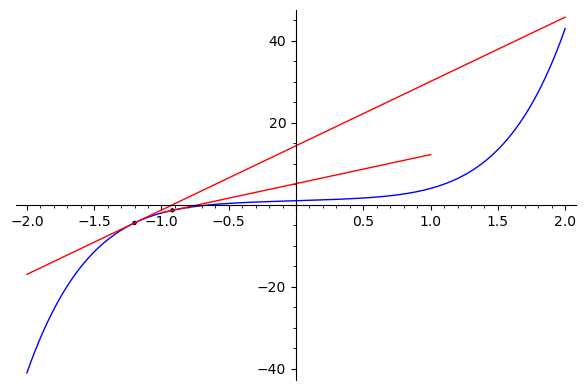

In [92]:
xa = solve(TA == 0,x)[0].rhs()
TXA = tangente(h,xa)
graph += plot(TXA,color="red") + point((xa,h(xa)),color="black")
graph.show()

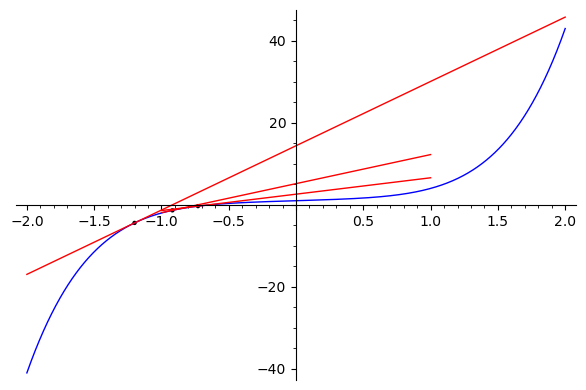

In [93]:
xa2 = solve(TXA == 0,x)[0].rhs()
TXA2 = tangente(h,xa2)
graph += plot(TXA2,color="red") + point((xa2,h(xa2)),color="black")
graph.show()

### Question
1. Ecrire un algorithme qui applique la méthode de Newton pour renvoyer une racine d'une fonction dérivable $f$. Votre algorithme prendra en entrée la fonction $f$ ainsi qu'un point de départ $a$ (proche d'une racine) et une précision $p$.
1. Utiliser votre algorithme sur les fonctions $f'$ et $h$ avec différents points de départ pour trouver toutes leurs racines.
1. Ajouter un compteur permettant de connaitre le nombre de points calculés. Comparer cette méthode avec les deux précédentes sur la fonction $h$ en prenant comme départ $a=-1.2$ et $b=0$. Laquelle arrive à une précision donnée le plus rapidement?

In [95]:
def newton(f,a,p,n = 1):
    TA(x) = tangente(f,a)
    a = solve(TA == 0,x)[0].rhs()
    if abs(f(a)) <= p:
        R = RealField(1 + log(1/p,2))
        return (R(a),n)
    return newton(f,a,p,n + 1)

In [101]:
show(dicho_roots(h,-0.8,0.8,0.1))
show(newton(h,-2,0.1))

(-0.62, 6)

(-0.62, 5)